In [6]:
#Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import PchipInterpolator
from scipy.integrate import quad

In [27]:
#Import and format data as required
test_data = np.genfromtxt('ScaledData.csv', delimiter=',', skip_header=1, usecols = (1,2,3,4,5,6,7,8,9,10,11,12))
ListTest = [ [[],[],[],[],[],[]], [[],[],[],[],[],[]],[[],[],[],[],[],[]],[[],[],[],[],[],[]],[[],[],[],[],[],[]]]
for i in range(0,test_data.shape[0]):
    for j in range(0,6):
        for k in range(0,5):
            if j == 0 or j == 5:
                ListTest[i][j].insert(k, 0)
            else:
                if k == 0 or k == 4:
                    ListTest[i][j].insert(k, 0)
                else:
                    if j == 1:
                        if k == 1:
                            ListTest[i][j].insert(k, test_data[i][8])
                        if k == 2:
                            ListTest[i][j].insert(k, test_data[i][4])
                        if k == 3:
                            ListTest[i][j].insert(k, test_data[i][0])
                    elif j == 2:
                        if k == 1:
                            ListTest[i][j].insert(k, test_data[i][9])
                        if k == 2:
                            ListTest[i][j].insert(k, test_data[i][5])
                        if k == 3:
                            ListTest[i][j].insert(k, test_data[i][1])
                    elif j == 3:
                        if k == 1:
                            ListTest[i][j].insert(k, test_data[i][10])
                        if k == 2:
                            ListTest[i][j].insert(k, test_data[i][6])
                        if k == 3:
                            ListTest[i][j].insert(k, test_data[i][2])
                    elif j == 4:
                        if k == 1:
                            ListTest[i][j].insert(k, test_data[i][11])
                        if k == 2:
                            ListTest[i][j].insert(k, test_data[i][7])
                        if k == 3:
                            ListTest[i][j].insert(k, test_data[i][3])
testArray = np.array(ListTest)

In [8]:
def VolumetricAirFlow12Points(scaleSize, inputArray):
    x, y = np.array([0,(2/3)/scaleSize,3/scaleSize,(16/3)/scaleSize,(22/3)/scaleSize,8/scaleSize]), np.array([0,(0.5)/scaleSize,2.1875/scaleSize,3.875/scaleSize,4.375/scaleSize])
    testInterp = RegularGridInterpolator((x, y), inputArray, method='cubic', bounds_error=False, fill_value=None)
    basePointX = (2/3)/scaleSize
    shiftAmountX = (4/12)/scaleSize
    shiftAmountY = (4.375/20)/scaleSize
    squareSize = (((3.25/12)/scaleSize) * ((4.375/20)/scaleSize))
    volumetricAirFlow = 0
    temp = 0
    for i in range(0,23):
        for j in range(0,20):
            xPoint = basePointX - shiftAmountX + (shiftAmountX * i)
            yPoint = 0 + (shiftAmountY * j)
            temp = testInterp((xPoint,yPoint))
            volumetricAirFlow = volumetricAirFlow + (squareSize * temp)
    print("The volumetric air flow is", volumetricAirFlow, "cfs")

In [28]:
VolumetricAirFlow12Points(9.962123178, testArray[0])
VolumetricAirFlow12Points(9.962123178, testArray[1])
VolumetricAirFlow12Points(1, testArray[2])
VolumetricAirFlow12Points(1, testArray[3])
VolumetricAirFlow12Points(1, testArray[4])

The volumetric air flow is 2.7744001204351543 cfs
The volumetric air flow is 1.6016757743504355 cfs
The volumetric air flow is 1734.5807874727946 cfs
The volumetric air flow is 1944.114140441465 cfs
The volumetric air flow is 3178.060081829935 cfs


In [10]:
#Starting from here we have finding mass airflow from tube measurements
#This is data from the 11.42 psi test
x_airtube = np.array([0,1.453125/12,2.90625/12,5.1825/12,8.71875/12,10.171875/12,11.625/12])
y_airtube = np.array([108,122,148,135,310,283,108])
y_airtube = y_airtube * (1013/864.54)
y_airtube = y_airtube / 60
pointsInterp = PchipInterpolator(x_airtube,y_airtube)
circle = lambda x: np.sqrt((5.8125/12)**2 - ((x-(5.8125/12))**2))
stepSize = (11.625/12)/100
currentStep = 0
tubeAirFlow = 0
for i in range(0,100):
    temp = quad(circle,currentStep,currentStep+stepSize)
    tubeAirFlow = tubeAirFlow + temp[0] * ((pointsInterp([currentStep])[0] + pointsInterp([currentStep+stepSize])[0])/2)
    currentStep = currentStep + stepSize
print("Volumetric airflow from tube",tubeAirFlow*2, "cfs")

Volumetric airflow from tube 2.7994198150678713 cfs


In [11]:
x_airtube = np.array([0,1.453125/12,2.90625/12,5.1825/12,8.71875/12,10.171875/12,11.625/12])
y_airtube = np.array([290,301,362,390,404,323,290])
y_airtube = y_airtube * (1013/864.54)
y_airtube = y_airtube / 60
pointsInterp = PchipInterpolator(x_airtube,y_airtube)
circle = lambda x: np.sqrt((5.8125/12)**2 - ((x-(5.8125/12))**2))
stepSize = (11.625/12)/100
currentStep = 0
tubeAirFlow = 0
for i in range(0,100):
    temp = quad(circle,currentStep,currentStep+stepSize)
    tubeAirFlow = tubeAirFlow + temp[0] * ((pointsInterp([currentStep])[0] + pointsInterp([currentStep+stepSize])[0])/2)
    currentStep = currentStep + stepSize
print("Volumetric airflow from tube",tubeAirFlow*2, "cfs")

Volumetric airflow from tube 5.297970371965986 cfs


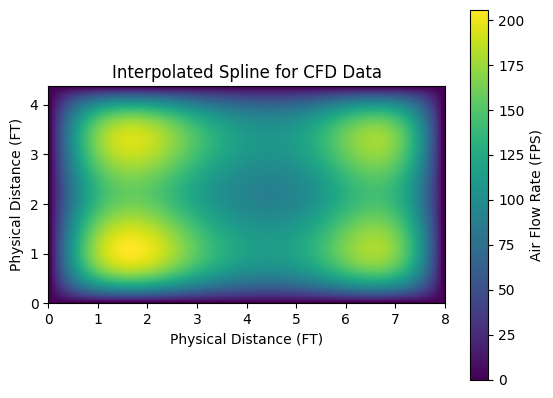

In [33]:
scaleSize = 1
x, y = np.array([0,(2/3)/scaleSize,3/scaleSize,(16/3)/scaleSize,(22/3)/scaleSize,8/scaleSize]), np.array([0,(0.5)/scaleSize,2.1875/scaleSize,3.875/scaleSize,4.375/scaleSize])
testInterp = RegularGridInterpolator((x, y), testArray[4], method='cubic', bounds_error=False, fill_value=None)
xx = np.linspace(0, 8/scaleSize, 100)
yy = np.linspace(0, 4.375/scaleSize, 100)
X, Y = np.meshgrid(xx, yy, indexing='ij')
z_interp = testInterp((X, Y))
z_interp = z_interp.T
fig = plt.figure()
ax = fig.add_subplot()
img = ax.imshow(z_interp, origin='lower',extent=[xx.min(),xx.max(),yy.min(),yy.max()])
fig.colorbar(img, label="Air Flow Rate (FPS)")
plt.xlabel("Physical Distance (FT)")
plt.ylabel("Physical Distance (FT)")
plt.title("Interpolated Spline for CFD Data")
plt.savefig("heatmap.png")

In [37]:
import sys
sys.version_info

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)

In [4]:
testArray[2]

NameError: name 'testArray' is not defined

In [5]:
import sys
!{sys.executable} -m pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 26.6 MB/s eta 0:00:0000:0100:01


In [25]:
ListTest = [ [[],[],[],[],[],[]], [[],[],[],[],[],[]],[[],[],[],[],[],[]],[[],[],[],[],[],[]]]
ListTest

[[[], [], [], [], [], []],
 [[], [], [], [], [], []],
 [[], [], [], [], [], []],
 [[], [], [], [], [], []]]